## UVOZ PODATKOV:

In [1]:
import pandas as pd
import numpy as np

In [2]:
igre = pd.read_csv('igre.csv', index_col='ime')

In [3]:
kategorije = pd.read_csv('kategorije.csv')
zanri = pd.read_csv('zanri.csv')

In [4]:
igre

,leto,odstotek,stevilo_ocen,cena,razvijalec,izdajatelj,RAM,prostor
ime,,,,,,,,
100% Orange Juice.html,2013,94,5921,6.99,Orange_Juice,Fruitbat Factory,1024.0,1024.0
12 is Better Than 6.html,2015,83,1834,6.99,Ink Stains Games,HypeTrain Digital,2048.0,300.0
20XX.html,2017,93,2149,14.99,Batterystaple Games,Batterystaple Games,1024.0,1024.0
60 Seconds!.html,2015,77,5385,9.99,Robot Gentleman,Robot Gentleman,4096.0,3072.0
8-Bit Armies.html,2016,80,1340,4.99,Petroglyph,Petroglyph,4096.0,2048.0
911 Operator.html,2017,82,3400,14.99,Jutsu Games,Games Operators,1024.0,500.0
A Bird Story.html,2014,84,4512,3.99,Freebird Games,Freebird Games,2048.0,200.0
A Hat in Time.html,2017,98,6889,27.99,Gears for Breakfast,Gears for Breakfast,4096.0,5120.0
A Story About My Uncle.html,2014,92,8982,12.99,Gone North Games,Coffee Stain Publishing,2048.0,2048.0


In [5]:
%matplotlib inline

In [6]:
igre['skupine_cen'] = 5 * (((igre['cena'] - 1) // 5) + 1)

Ustvari skupine cen, vsaka skupina ima razpon 5€. Zastonj igre so v svoji skupini.
Spodnji graf prikazuje število iger v posameznem cenovnem razredu.

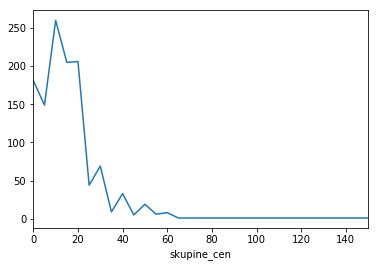

In [7]:
igre.groupby('skupine_cen').size().plot.line()

In [8]:
tabela1 = zanri.join(igre, on='ime')
tabela2 = kategorije.join(igre, on='ime')

## Analiza glede na žanre

In [9]:
tabela1.groupby('zanr').size().sort_values()

zanr
Sports                    51
Racing                    52
Early Access              94
Massively Multiplayer    105
Free to Play             148
Casual                   170
Simulation               263
RPG                      306
Strategy                 327
Adventure                409
Action                   601
Indie                    613
dtype: int64

Pričakovano je največ iger akcijskih (žanr "Indie" se nanaša na majhnega, neodvisnega razvijalca igre, ne pa na njeno vsebino).
Čudi me veliko število strateških in simulacijskih iger. Pričakoval bi, da bo teh manj od recimo dirkaških iger.

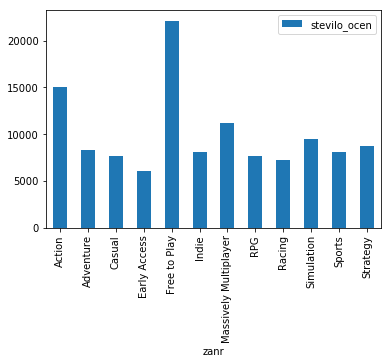

In [10]:
tabela1.groupby('zanr').mean().plot.bar(y='stevilo_ocen')

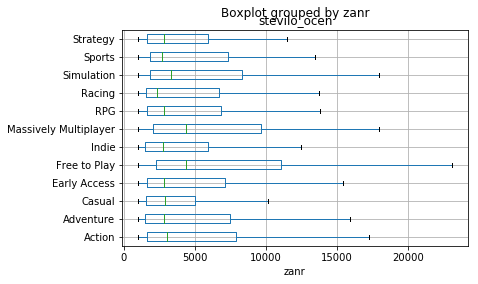

In [11]:
tabela1.boxplot(column=['stevilo_ocen'], by='zanr', showfliers=False, vert=False)

Najbolj popularen žanr (glede na vsebino igre) je akcijski (ta ima največje povprečje števila ocen). A iz grafa s škatlami z brki je razvidno, da je za to zasluženih le nekaj posebno popularnih akcijskih iger. Mediana števila glasov namreč ni posebno velika. 

Pri mediani bolj izstopajo zastonj igre ('Free to Play') in 'Massive Multiplayer', to so igre, namenjene predvsem večigralski igri (denimo Call of Duty). Ta žanra se sicer ne nanašata na vsebino. Zastonj igre so pričakovano zelo priljubljene, tu bi mogoče bolj smiselno bilo preučevati čas igranja takih iger (ki ga ne morem dobiti). Možno je, da večina ljudi zastonj igre zgolj poskusi, ker nimajo zgubiti drugega kot svoj čas.

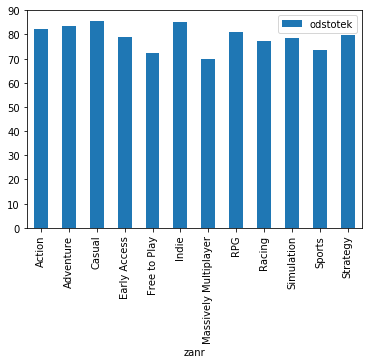

In [12]:
tabela1.groupby('zanr').mean().plot.bar(y='odstotek')

Pri kakovosti iger (gledano glede na delež dobrih odzivov) so si žanri dokaj enakovredni. Malo odstopajo le zastonj igre (ponovno, nič čudnega, saj kakovostne igre navadno niso zastonj) in večigralske ('Massively Multiplayer'), mogoče zato, ker je v teh igrah težje biti dober, posledično pa večje število nezadovoljnih ljudi (ker jim igranje ne gre od rok) da slabo oceno.

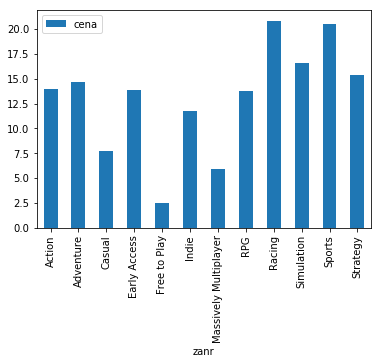

In [13]:
tabela1.groupby('zanr').mean().plot.bar(y='cena')

Graf prikazuje povprečno ceno igre glede na žanr. Mogoče tu tuči razlog za manjšo popularnost dirkaških in športnih iger.

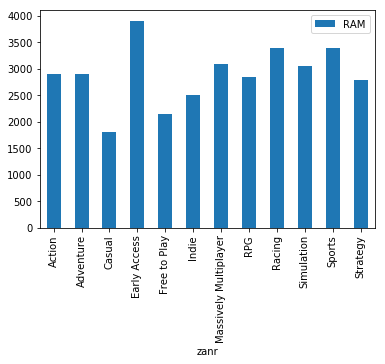

In [14]:
tabela1.groupby('zanr').mean().plot.bar(y='RAM')

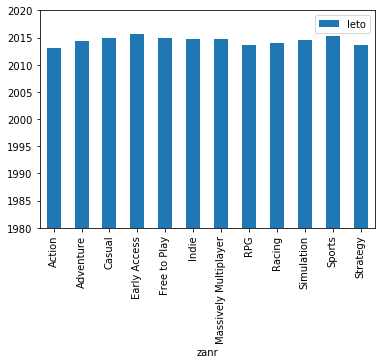

In [15]:
tabela1.groupby('zanr').mean().plot.bar(y='leto', ylim=[1980, 2020])

'Early Access' igre (to so igre, ki jih je mogoče kupiti po nižji ceni, še preden so dokončno dodelane) izstopajo pri zahtevnosti RAMa. Mislil sem, da je vzrok v tem, da so te igre relativno nove, saj jih je potrebno stalno posodabljati, to pa je pred časom bilo zahtevnejše zaradi počasnejše internetne povezave. A graf, ki prikazuje povprečno starost iger, tega ne podpira. Razlike so komaj opazne.

### Ali sta popularnost in ocene iger odvisna od cene?

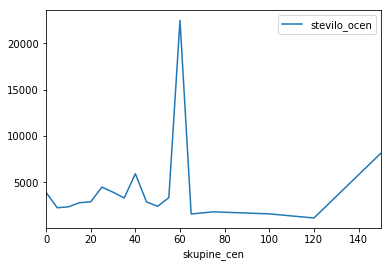

In [16]:
igre.groupby('skupine_cen').median().plot.line(y='stevilo_ocen')

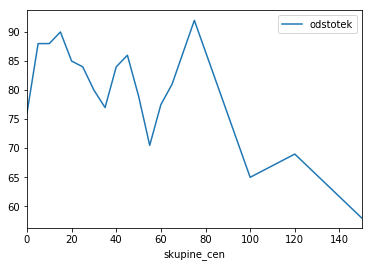

In [17]:
igre.groupby('skupine_cen').median().plot.line(y='odstotek')

Z izjemo velikega skoka pri ceno 60€ iz zelo dragih iger (nad 60€) razlik med popularnostjo iger pri različnih cenah ni. Delež dobrih ocen prav tako upade pri dražjih igrah, verjetno zato, ker igralci od dražjih iger pričakujejo mnogo več.
Poglejmo, katere igre so v cenovnem razredu 60€.

In [18]:
igre[igre['skupine_cen']==60]

,leto,odstotek,stevilo_ocen,cena,razvijalec,izdajatelj,RAM,prostor,skupine_cen
ime,,,,,,,,,
"ARK, Survival Evolved.html",2017,68,151140,59.99,Studio Wildcard,Studio Wildcard,8192.0,61440.0,60.0
Assassin's Creed® Origins.html,2017,84,27579,59.99,Ubisoft Montreal,Ubisoft,6144.0,43008.0,60.0
DARK SOULS™ III.html,2016,90,57730,59.99,"FromSoftware, Inc.","FromSoftware, Inc.",4096.0,25600.0,60.0
Project CARS 2.html,2017,69,2825,59.99,Slightly Mad Studios,BANDAI NAMCO Entertainment,8192.0,51200.0,60.0
Tom Clancy's Ghost Recon® Wildlands.html,2017,73,22811,59.99,Ubisoft Paris,Ubisoft,6144.0,51200.0,60.0
"Total War, WARHAMMER II.html",2017,86,9428,59.99,CREATIVE ASSEMBLY,SEGA,5120.0,61440.0,60.0
"Total War, WARHAMMER.html",2016,75,22176,59.99,CREATIVE ASSEMBLY,SEGA,3072.0,35840.0,60.0
Watch_Dogs® 2.html,2016,80,19155,59.99,Ubisoft,Ubisoft,6144.0,27648.0,60.0


Kot lahko vidimo je v cenovnem razredu 60€ nekaj zelo priljubljenih iger. Verjetno zgolj naključje.
Pomanjkanje vzorca potrjuje spodnji graf. Na x-osi je cena igre (igre, dražje od 70€, so zaradi preglednosti izpuščene), na y-osi pa število ocen v logaritemskem merilu. Vidimo lahko, da je posebnost cenovnega razreda 60€ le ta, da nima nobene igre z zelo majhnim številom ocen.

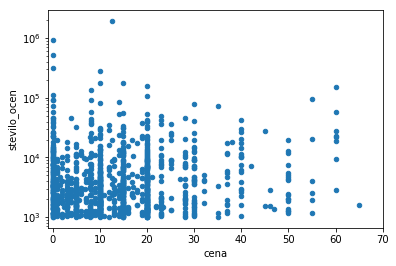

In [19]:
igre.plot.scatter(x='cena', y='stevilo_ocen', xlim=[-1, 70], logy=True)

## Analiza glede na razvijalce in izdajatelje iger

In [20]:
razvijalci = igre.groupby('razvijalec').size().sort_values(ascending=False)
razvijalci

razvijalec
Valve                                                       21
Ubisoft Montreal                                            11
Firaxis Games                                                8
Double Fine Productions                                      7
CREATIVE ASSEMBLY                                            7
id Software                                                  7
Daedalic Entertainment                                       7
Rebellion                                                    7
Telltale Games                                               6
Team17 Digital Ltd                                           6
Traveller's Tales                                            6
Idea Factory                                                 6
Paradox Development Studio                                   6
Bethesda Game Studios                                        5
BioWare                                                      5
LucasArts                                   

In [21]:
izdajatelji = igre.groupby('izdajatelj').size().sort_values(ascending=False)
izdajatelji

izdajatelj
Ubisoft                                         44
SEGA                                            26
Valve                                           24
Electronic Arts                                 22
Warner Bros. Interactive Entertainment          16
BANDAI NAMCO Entertainment                      16
Focus Home Interactive                          15
Devolver Digital                                15
THQ Nordic                                      14
2K                                              13
Paradox Interactive                             13
LucasArts                                       12
505 Games                                       11
Team17 Digital Ltd                              10
Microsoft Studios                               10
Codemasters                                      9
Square Enix                                      8
Daedalic Entertainment                           8
Capcom                                           8
Bethesda Softworks  

Takoj vidimo, da je razvijalcev več kot izdajateljev. Nekateri majhni razvijalci izdajo igro pri večjih, znanih podjetjih, ki jo lahko bolje oglašujejo.

Primerjajmo število ocen in ocene iger znanih in manj znanih (neodvisnih) razvijalcev oz. izdajateljev (žanr 'indie' = independent):

In [22]:
tabela1['zanr2'] = (tabela1['zanr']=='Indie')

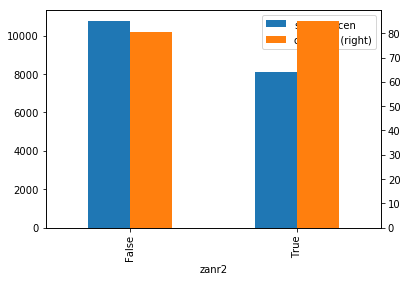

In [23]:
tabela1.groupby('zanr2').mean().plot.bar(y=['stevilo_ocen', 'odstotek'], secondary_y=('odstotek'))

"False" so igre izven žanra 'Indie', "True" pa igre znotraj žanra.
Pričakovano so igre znanih razvijalcev bolj znane (ravno zato so ti razvijalci znani). Delež dobrih ocen je rahlo večji pri neodvisnih razvijalcih. To me ne čudi. Igre neodvisnih razvijalcev pogosto ciljajo mnogo ožjo skupino igralcev kot igre znanih razvijalcev. Razvijalci se lahko zato bolj posvetijo nekaterim podrobnostim, ki se jim drugače ne bi mogli. Prav tako si manj znani razvijalci ne morejo privoščiti slabše igre, saj še nimajo znanega imena, ki bi jim igro prodalo samo od sebe.

Enaka analiza na skupini zgolj velikih razvijalcev:

In [24]:
igre['moc_raz'] = 0
igre['moc_izd'] = 0

In [25]:
for index, igra in igre.iterrows():
    igre.at[index, 'moc_raz'] = razvijalci[igre.loc[index, 'razvijalec']]
    igre.at[index, 'moc_izd'] = izdajatelji[igre.loc[index, 'izdajatelj']]

Zgoraj: vsaki igri dopiše število vseh iger, ki so bile razvite oz. izdane z njenim razvijalcem oz. izdajateljem.
Spodaj: omejimo se le na igre, katerih razvijalec oz. izdajatelj je na 10. mestu po številu svojih iger.

In [26]:
izbor_raz = igre[igre['moc_raz'] >= razvijalci[9]]
izbor_izd = igre[igre['moc_izd'] >= izdajatelji[9]]

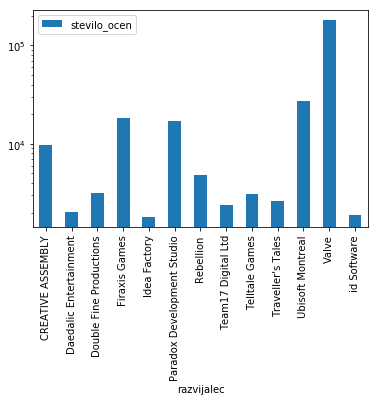

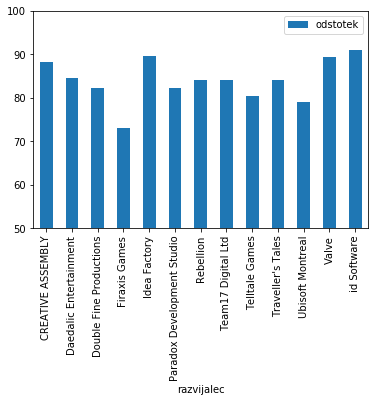

In [27]:
izbor_raz.groupby('razvijalec').mean().plot.bar(y='stevilo_ocen', logy=True)
izbor_raz.groupby('razvijalec').mean().plot.bar(y='odstotek', ylim=[50, 100])

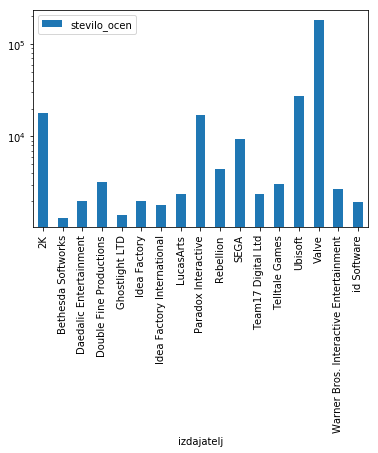

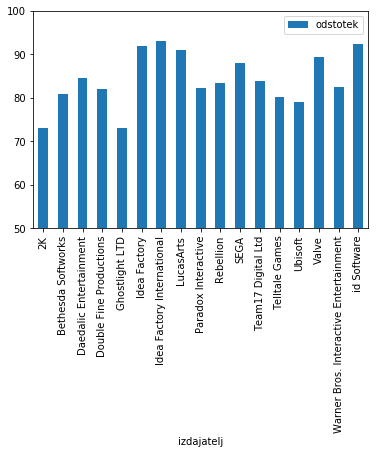

In [28]:
izbor_raz.groupby('izdajatelj').mean().plot.bar(y='stevilo_ocen', logy=True)
izbor_raz.groupby('izdajatelj').mean().plot.bar(y='odstotek', ylim=[50, 100])

Valve je očitno daleč najbolj popularen, hkrati pa je tudi med najbolje ocenjenimi.
Po številu ocen (popularnosti) naslednji trije razvijalci oz. izdajatelji pa so nasprotno povprečno ali podpovprečno ocenjeni.

Večjih zaključkov ni mogoče narediti, ker so nekatere večje igre (denimo Grand Theft Auto) izključene iz analize zaradi vsebine, neprimerne za otroke (predvsem nasilja). Pri teh igrah spletna stran zahteva vnos datuma rojstva, zato Python ni mogel pobrati strani z njenim opisom.

Primerjajmo med seboj še 'indie' in ostale igre glede na ceno ter zahtevano zmogljivost (RAM in trdi disk):

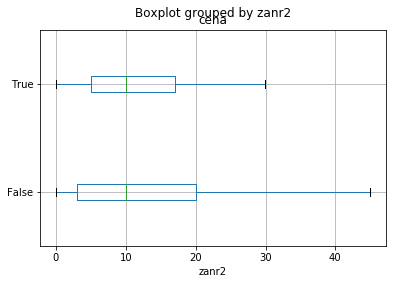

In [29]:
tabela1.boxplot(column=['cena'], by='zanr2', showfliers=False, vert=False)

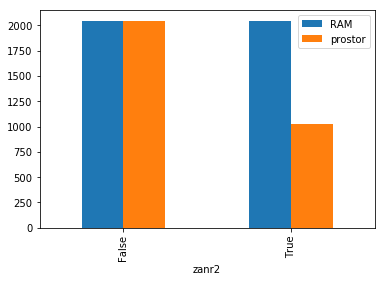

In [30]:
tabela1.groupby('zanr2').median().plot.bar(y=['RAM', 'prostor'], secondary_y=('odstotek'))

Opazimo lahko, da so cene približno enake, z izjemo manjšega števila dražjih iger, ki niso v žanru 'indie'. To so velike igre z ogromno vsebine. To potrjuje tudi dejstvo, da igre izven žanra navadno potrebujejo več prostora na trdem disku (vidno iz zadnjega grafa). Večji razvijalski studiji si namreč lahko privoščijo zasnovati mnogo večje igre z bolj bogato vsebino.

V RAMu razlik praktično ni. S tega bi se dalo sklepati, da se izgled in mehanika iger ne razlikujeta glede na žanr 'indie'.

### Ali se kakovost iger izboljšuje s časom?

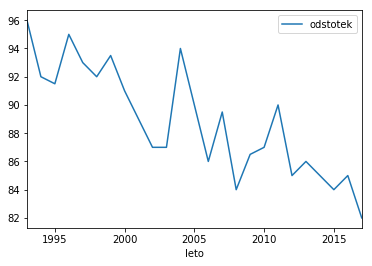

In [31]:
igre.groupby('leto').median().plot.line(y='odstotek')

Ne, kakovost pada.